# <span style = "color: green">Simple Linear Regression<span>

***

In this example, we will consider sales based on 'TV' marketing budget.<br>
We'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

### Understanding the data

#### Import pandas

In [2]:
import pandas as pd

#### Read the dataset with pandas

In [3]:
df = pd.read_csv('tvmarketing.csv')

#### View the first five rows of the dataset

In [5]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


#### View the last 5 row

In [6]:
df.tail(
)

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


#### Check info about the dataset

In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


#### Check the number of rows and columns in the dataset

In [9]:
df.shape

(200, 2)

#### Quick view the basic statistical information about the dataset

In [10]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Visualising the data using Seaborn Library

#### Import Matplotlib, Seaborn and set matplotlib inline

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Visualize the relationship between the features and the response using scatterplots

<Axes: xlabel='TV', ylabel='Sales'>

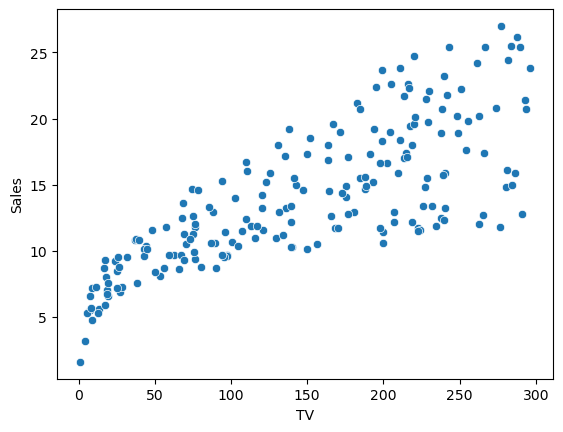

In [13]:
 sns.scatterplot(x= df['TV'], y= df['Sales'])

## Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

### Preparing X and y (Independent and Dependent variables)
-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

#### Assign feature variable(Independent variable) to X

In [14]:
X = df[['TV']] 

#### Print the first five rows of X

In [15]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


#### Assign response variable(Dependent variable or target variable) to y

In [16]:
 y = df['Sales']

#### Split the data into Training and testing Sets

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


# random_state is the seed used by the random number generator, it can be any integer.
# If we don't specify a random state integer, we get different training and test data every time we run the code

In [ ]:
   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentationy

#### Check the shape of training and testing set

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


### Performing Linear Regression

#### Import LinearRegression from sklearn linear model

In [23]:
from sklearn.linear_model import LinearRegression 

#### Create a LinearRegression object

In [31]:
 lr = LinearRegression()

#### Train the model (lr) using fit 

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

#### Print the coefficient and Intercept 

In [34]:
print(lr.coef_)
print(lr.intercept_)

[0.04649736]
6.989665857411677


#### Check the score of our model

In [35]:
lr.score(X_train, y_train)

0.6134312469429992

### Make predictions on the testing set

In [39]:
y_pred = lr.predict(X_test) 

In [40]:
len(y_pred)

60

In [41]:
num = [i for i in range(1,61)]
num

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

### Plot a graph to check the accuracy of our prediction

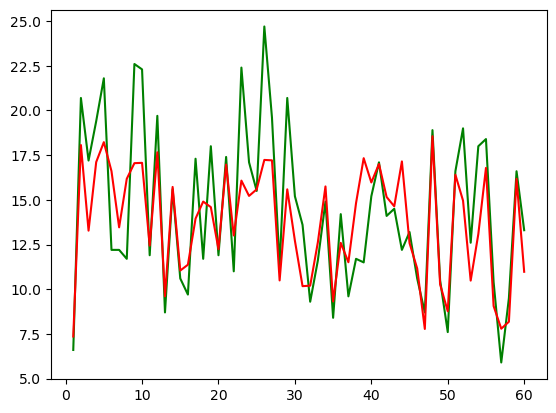

In [46]:
plt.plot(num, y_test, color= 'green')
plt.plot(num, y_pred, color= 'red')

### Plot a scatterplot of actual values vs predicted

<Axes: ylabel='Sales'>

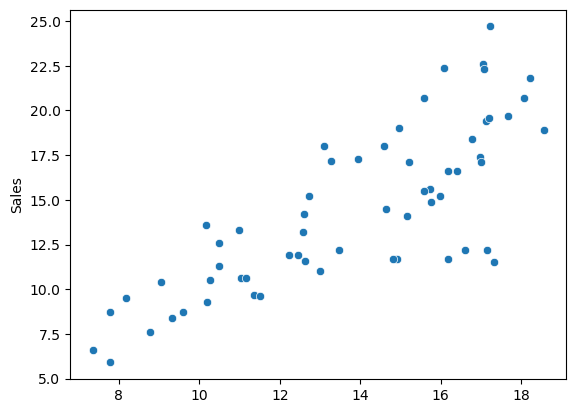

In [47]:
sns.scatterplot(x= y_pred, y= y_test )

### Calculate mean squared error and r2_score

Mean Squared Error:It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.

y-ypred<sup>2<sup>
    
$$e_i= YPred-Yi$$ 
$$Y pred= mx+c$$
i.e, $$e_1=((m_i*x+c)-y_i)$$
    
i.e, $$e_1^2=(y_1 - (m_i*x+c))^2$$

#### Import mean_squared_error and r2_score from sklearn.metrics

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

#### Calculate the mean squared error

In [51]:
mean_squared_error(y_test, y_pred)

7.975798532854851

#### Calculate r2_score

In [52]:
r2_score(y_test, y_pred)

0.5942987267783302

***